In [1]:
pip install scikit-learn pandas


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np



In [4]:
data=pd.read_csv('Student_Marks.csv')
print(data)

    number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]


In [16]:
X=data[['time_study','number_courses']]
y=data['Marks']

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

scaler = StandardScaler()
model=LinearRegression()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# model.fit(X_scaled, y)
# predictions = model.predict(X_scaled)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Predictions:",predictions)

# evaluation of model 
mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predictions)

print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R^2 Score:",r2)

Predictions: [19.27278272 37.76035676 20.18779372  9.65670863 10.97508223 44.81200554
 13.34810968 47.62447209 37.01567001 22.30738483 44.48113375 28.33573684
  7.42332402 38.70638699 28.10820618 48.74122069 35.72331468 39.30103485
 28.29432156  8.94326632]
Mean Absolute Error: 3.07934522966669
Mean Squared Error: 14.200726136374607
Root Mean Squared Error: 3.768385083344669
R^2 Score: 0.9459936100591211


The model shows good performance, with an average prediction error of about 3 marks, which is relatively low compared to the total marks range. This indicates the model is reasonably accurate and captures the underlying pattern between study time, number of courses, and marks.

In [17]:
pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


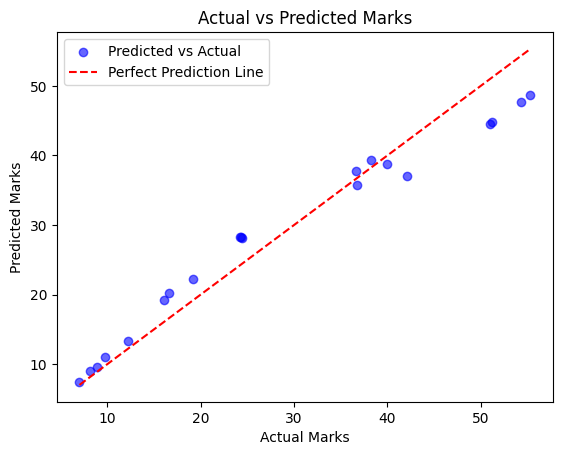

In [18]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.scatter(y_test, predictions, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.legend()
plt.show()
